# Interpolazione delle curve di Gumbel con il metodo dei minimi quadrati

http://scipy-cookbook.readthedocs.io/items/robust_regression.html

Where $\epsilon_i$ is the measurement (observation) errors. In the least-squares estimation we search xx as the solution of the following optimization problem: 
\begin{equation} 
\delta^2(a,b) = \sum_i^N (ECDF_i-P[h_i;a,b])^2 \to \rm min 
\end{equation}

In [1]:
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title

In [2]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt

os.getcwd()
os.chdir("/Users/riccardo/Dropbox/A-Data/Paperopoli")
data = pd.read_csv('PluviometriaPaperopoli_4.txt')
map(datetime,data['anno'])
data=data.set_index('anno')

In [3]:
data

,1h,3h,6h,12h,24h
anno,,,,,
1925,50.0,NaN,NaN,NaN,NaN
1928,35.0,47.0,50.0,50.4,67.6
1929,35.4,36.4,36.4,49.6,74.0
1930,67.2,68.2,80.8,102.2,106.8
1931,25.2,NaN,NaN,NaN,NaN
1932,35.2,NaN,NaN,NaN,NaN
1934,48.6,NaN,NaN,NaN,NaN
1935,36.4,55.2,81.0,94.4,149.0
1936,47.8,54.2,55.4,55.6,74.6


In [4]:
from statsmodels.distributions.empirical_distribution import ECDF

In [5]:
#t_train = np.linspace(t_min, t_max, 30)
#y_train = generate_data(t_train, A, sigma, omega, noise=noise, n_outliers=4)

In [5]:
def fun(x, t, y):
    return np.exp(-np.exp(-(t-x[0])/x[1]))-y

In [6]:
from scipy.optimize import least_squares

In [7]:
x0=[30.,9.]

In [8]:
ecdf1h = ECDF(data["1h"])

In [9]:
ecdf1h

In [2]:
t_train=sorted(data["1h"])
y_train=ecdf1h(t_train)

NameError: name 'data' is not defined

In [11]:
res_lsq_1h = least_squares(fun, x0, args=(t_train, y_train))

In [1]:
res_lsq_1h.x

NameError: name 'res_lsq_1h' is not defined

In [13]:
ecdf3h = ECDF(data["3h"])

In [14]:
x0=[39.,10.]

In [16]:
t_train=sorted(data["3h"].dropna())
y_train=ecdf3h(t_train)
res_lsq_3h = least_squares(fun, x0, args=(t_train, y_train))
res_lsq_3h.x

array([ 40.17696974,  11.4592214 ])

In [17]:
ecdf6h = ECDF(data["6h"])
x0=[48.,12.]
t_train=sorted(data["6h"].dropna())
y_train=ecdf6h(t_train)
res_lsq_6h = least_squares(fun, x0, args=(t_train, y_train))
res_lsq_6h.x

array([ 48.43626056,  16.93830234])

In [18]:
ecdf12h = ECDF(data["12h"])
x0=[48.,12.]
t_train=sorted(data["12h"].dropna())
y_train=ecdf12h(t_train)
res_lsq_12h = least_squares(fun, x0, args=(t_train, y_train))
res_lsq_12h.x

array([ 61.72207872,  25.04059156])

In [19]:
ecdf24h = ECDF(data["24h"].dropna())
x0=[48.,12.]
t_train=sorted(data["24h"].dropna())
y_train=ecdf24h(t_train)
res_lsq_24h = least_squares(fun, x0, args=(t_train, y_train))
res_lsq_24h.x

array([ 73.47156597,  23.68582654])

In [20]:
abs_mq=pd.DataFrame([res_lsq_1h.x,res_lsq_3h.x,res_lsq_6h.x,res_lsq_12h.x,res_lsq_24h.x],columns=["a","b"],
                     index=["1h","3h","6h","12h","24h"]).T
abs_mq

,1h,3h,6h,12h,24h
a,31.740980,40.176970,48.436261,61.722079,73.471566
b,8.003627,11.459221,16.938302,25.040592,23.685827


In [21]:
abs_mq.to_pickle("abs_mq")

In [22]:
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain=np.linspace(data.min()[0],data.max()[4],100)

In [23]:
gb=pd.DataFrame([gumbel(t_rain,abs_mq,"1h"),
                 gumbel(t_rain,abs_mq,"3h"),
                 gumbel(t_rain,abs_mq,"6h"),
                 gumbel(t_rain,abs_mq,"12h"),
                 gumbel(t_rain,abs_mq,"24h")]).T
gb.index=t_rain
gb.columns=["1h","3h","6h","12h","24"]
gb

,1h,3h,6h,12h,24
19.600000,0.010481,0.002421,0.004139,0.004621,0.000060
21.113131,0.022982,0.005101,0.006616,0.006334,0.000109
22.626263,0.044021,0.009799,0.010158,0.008523,0.000192
24.139394,0.075388,0.017365,0.015037,0.011270,0.000327
25.652525,0.117678,0.028669,0.021524,0.014661,0.000537
27.165657,0.170129,0.044487,0.029881,0.018780,0.000855
28.678788,0.230826,0.065380,0.040335,0.023709,0.001324
30.191919,0.297142,0.091616,0.053069,0.029526,0.001996
31.705051,0.366228,0.123133,0.068204,0.036301,0.002932
33.218182,0.435411,0.159549,0.085797,0.044092,0.004207


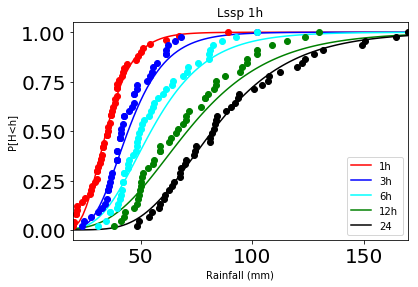

In [24]:
plt.rc('xtick', labelsize=20) #Quest  comandi globali
plt.rc('ytick', labelsize=20) #Questi sono comandi globali
ax=gb.plot(color=["red","blue","cyan","green","black"])
ecdf1h = ECDF(data["1h"])
ax.plot(data["1h"],ecdf1h(data["1h"]),'o',c="red")
data3h=data["3h"].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h,ecdf3h(data3h),"o",c="blue")
data6h=data["6h"].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h,ecdf6h(data6h),"o",c="cyan")
data12h=data["12h"].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h,ecdf12h(data12h),"o",c="green")
data24h=data["24h"].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h,ecdf24h(data24h),"o",c="black")
ax.set_title('Lssp 1h')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')